In [120]:
import warnings
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


warnings.filterwarnings('ignore')

### A: summarize the data

Below is the Count of all columns for each row. As we can see below there are a total of 1949 rows, however some of these rows have empty values for their columns which is evident in the lower counts for some columns such as log GDP per capita and Health Life expectancy at birth


NOTE: dropping year as specified in the instructions

In [122]:
df = pd.read_csv('happiness_data.csv').drop(columns=['year'])
print(df.count())

Country name                        1949
Life Ladder                         1949
Log GDP per capita                  1913
Social support                      1936
Healthy life expectancy at birth    1894
Freedom to make life choices        1917
Generosity                          1860
Perceptions of corruption           1839
Positive affect                     1927
Negative affect                     1933
dtype: int64


Country Name is categorical and may need to be encoded using One-Hot-Encoding

In [124]:

print("========= Unique Countries =========")
print(df['Country name'].unique())

========= Unique Countries =========
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxe

The rest of the columns contain continuos variable. plotted below are some of the basic statistics of these variables including but not limited to mean, std, and minimums

### B. Displaying statistical values

In [99]:
continuos_variable = df.drop(columns=['year', 'Country name'])

In [100]:
continuos_variable.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


array([[<Axes: title={'center': 'Life Ladder'}>,
        <Axes: title={'center': 'Log GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>],
       [<Axes: title={'center': 'Healthy life expectancy at birth'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>],
       [<Axes: title={'center': 'Perceptions of corruption'}>,
        <Axes: title={'center': 'Positive affect'}>,
        <Axes: title={'center': 'Negative affect'}>]], dtype=object)

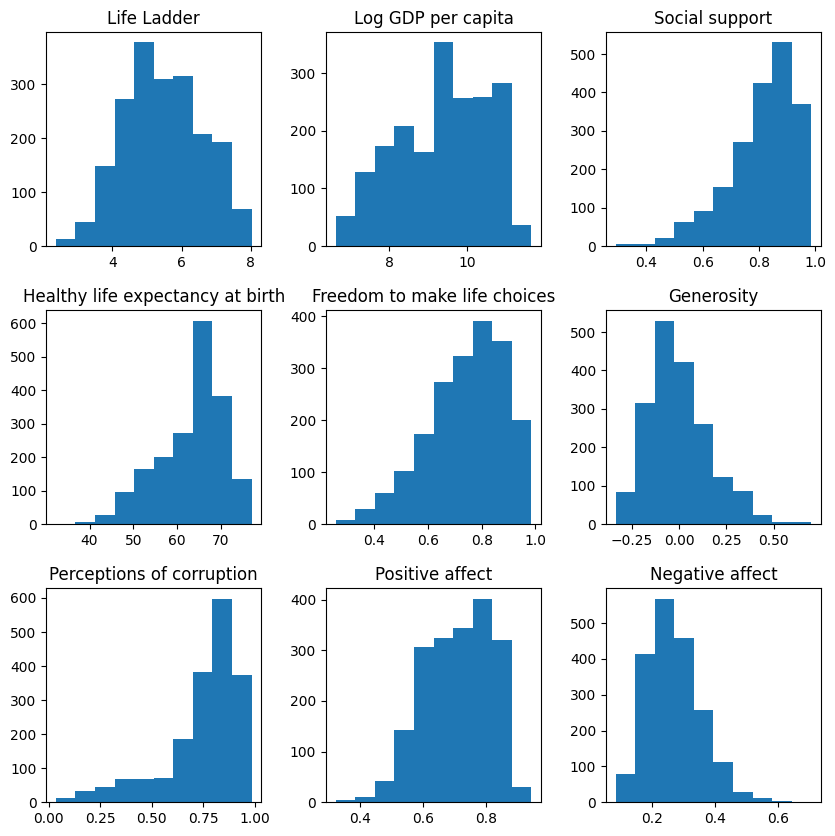

In [101]:
continuos_variable.hist( grid=False, figsize=(10,10))

Observations on the data:

A majority of values seem to be along a gaussian distribution however some variable such as Perceptions of corruption, Freedom to make life choices, and Healthy life expectancy at birth are left skewed. These variables may need to be scaled depednign of if Batch GD, stochastic GD, or mini-batch GD are being used in linear regression

### C. Exploring Relationships Between Columns

Correlation between continuos columns

<Axes: >

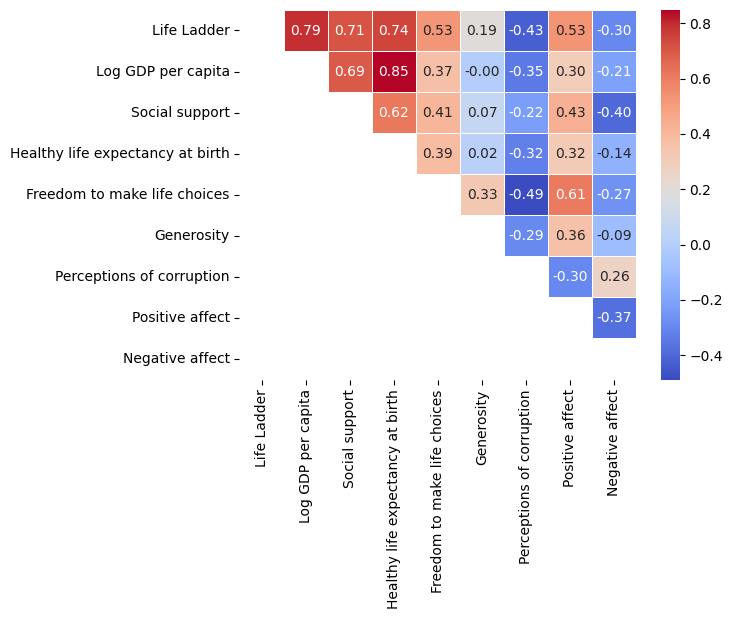

In [102]:
correlation_matrix = continuos_variable.corr()
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

scatter plots between all unique pairs of continuos columns

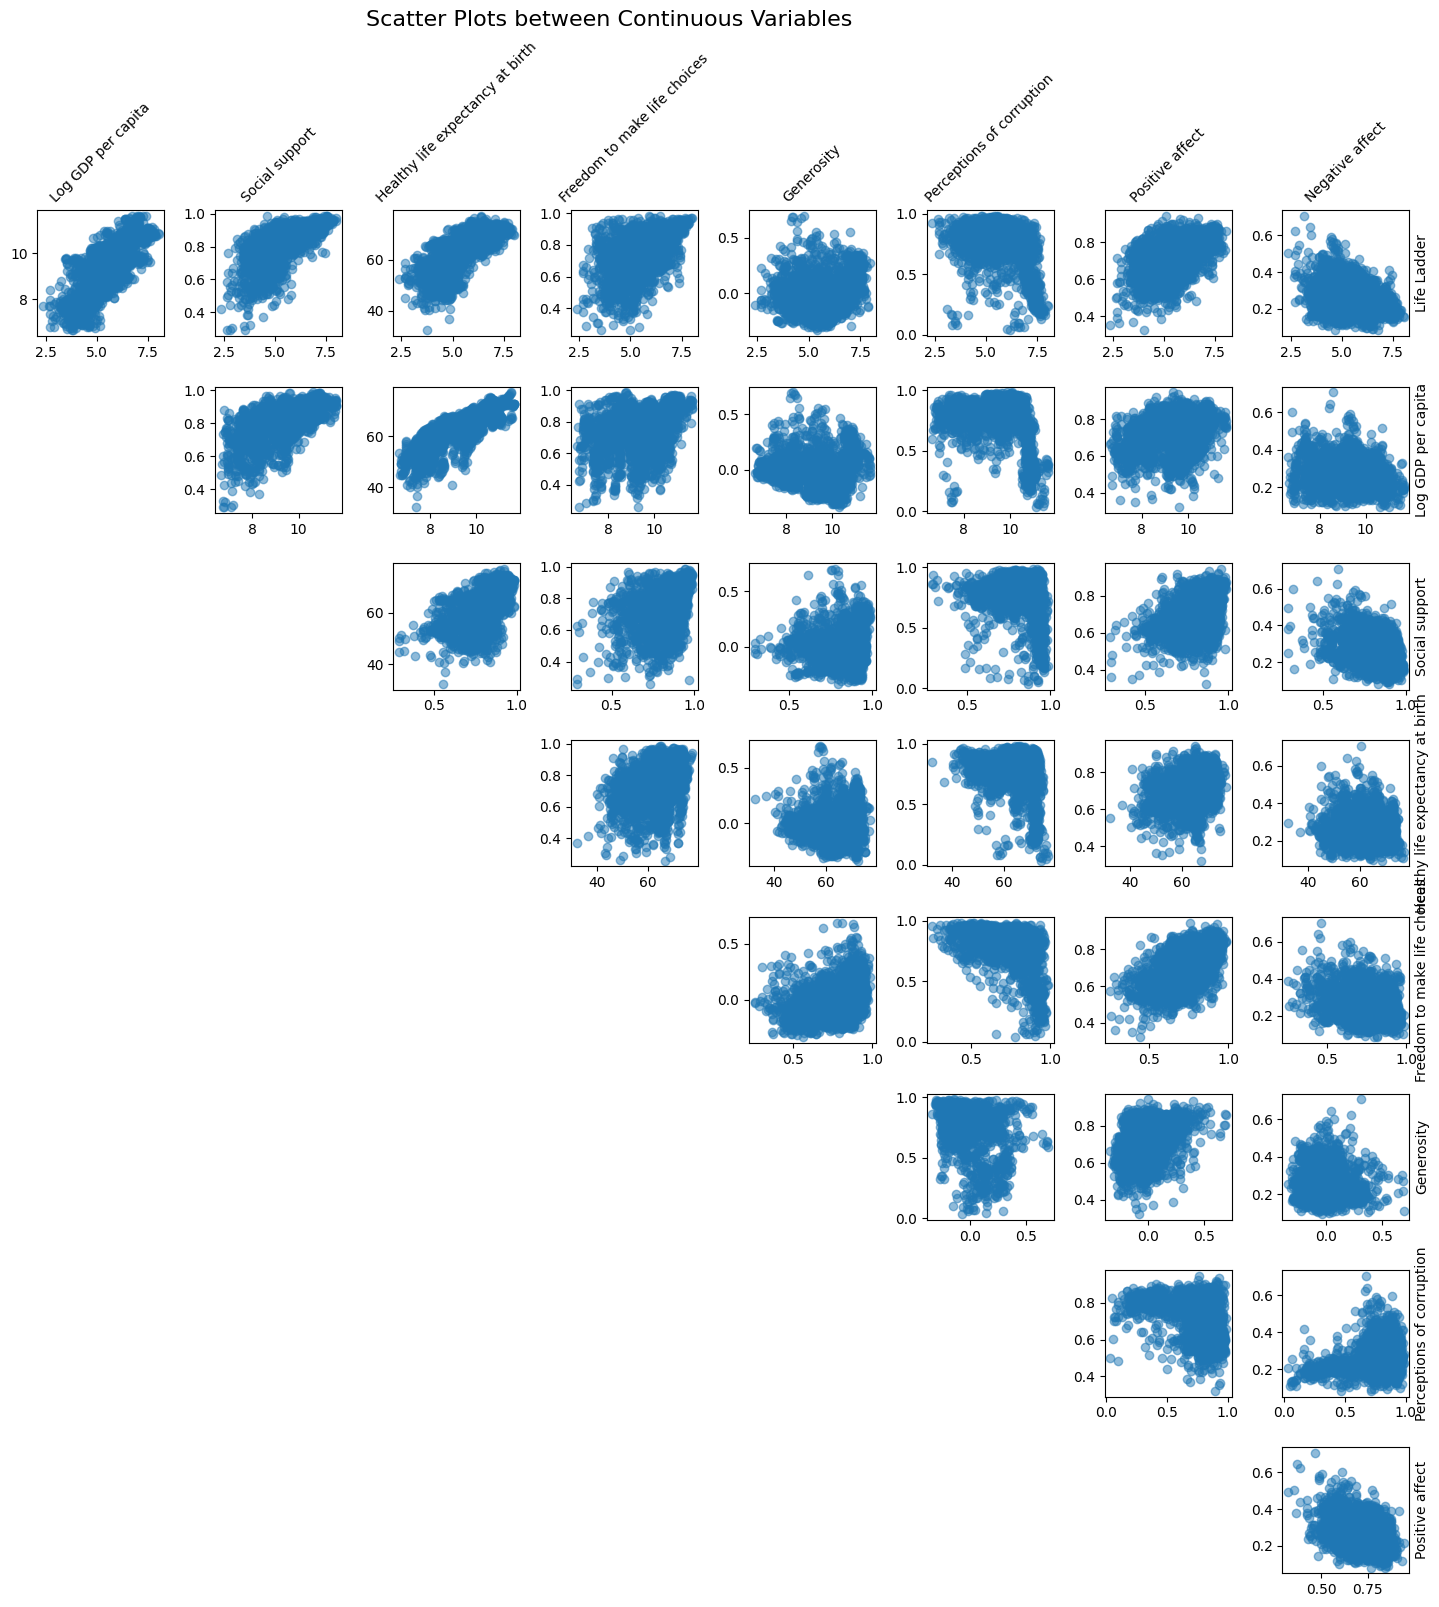

In [103]:
cols = continuos_variable.columns.tolist()
num_cols = len(cols)

# Set the size of the grid
fig, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(num_cols):
    for j in range(num_cols):
        if i < j:  # Only plot in the upper triangle (when column index j > i)
            col1 = cols[i]
            col2 = cols[j]
            axes[i, j].scatter(continuos_variable[col1], continuos_variable[col2], alpha=0.5)
            
            # Set labels for the x and y axes
            if i == 0:
                axes[i, j].set_title(col2, fontsize=10, rotation=45)
            if j == num_cols - 1:
                axes[i, j].set_ylabel(col1, fontsize=10,)
                axes[i, j].yaxis.set_label_position("right")

        else:
            axes[i, j].set_visible(False) 


for i in range(num_cols):
    axes[num_cols-1, i].set_xlabel(cols[i], fontsize=10)

# Show the plot
plt.suptitle('Scatter Plots between Continuous Variables', fontsize=16)
plt.show()

### D. Select 25% of the data for testing

Splitting the data into 75-25 split we check the validity by checking the similarity between the train and test data

In [138]:

train_data, test_data = train_test_split(continuos_variable, test_size=0.25, random_state=42)

print("Train Data")
train_data.describe()


Train Data


,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1461.000000,1436.000000,1453.000000,1424.000000,1443.000000,1395.000000,1380.000000,1445.000000,1449.000000
mean,5.457548,9.358944,0.812285,63.287343,0.740450,-0.000131,0.746502,0.708021,0.267628
std,1.117221,1.166775,0.118882,7.524471,0.143169,0.163348,0.188704,0.107348,0.084529
min,2.375000,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000
25%,4.639000,8.452250,0.753000,58.200000,0.645000,-0.116000,0.690000,0.623000,0.206000
50%,5.346000,9.448500,0.834000,65.142500,0.760000,-0.024000,0.804000,0.720000,0.258000
75%,6.269000,10.343250,0.905000,68.570000,0.854500,0.089000,0.874000,0.797000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [105]:
print('Test Data')
test_data.describe()

Test Data


,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,488.000000,477.000000,483.000000,470.000000,474.000000,465.000000,459.000000,482.000000,484.000000
mean,5.494121,9.397080,0.813356,63.577611,0.748975,0.000806,0.748998,0.715946,0.271287
std,1.111866,1.115716,0.117387,7.470715,0.138716,0.158939,0.181099,0.106243,0.087083
min,2.694000,6.723000,0.326000,40.808000,0.258000,-0.303000,0.078000,0.369000,0.103000
25%,4.677000,8.523000,0.744000,59.655000,0.661250,-0.107000,0.693000,0.629250,0.206750
50%,5.467000,9.518000,0.837000,65.290000,0.770000,-0.030000,0.800000,0.731000,0.259500
75%,6.342000,10.376000,0.904500,68.575000,0.860750,0.096000,0.868000,0.808000,0.319500
max,7.858000,11.520000,0.975000,75.000000,0.980000,0.650000,0.983000,0.934000,0.643000


### E. Training linear regression models

In [139]:
X_train = train_data.drop(columns=['Life Ladder']).values
y_train = train_data['Life Ladder'].values

closed form using the normal equation

In [142]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Predict using the learned parameters
y_train_pred = X_train_b.dot(theta_best)

# Calculate training MSE
mse = mean_squared_error(y_train, y_train_pred)
print(f'Training MSE (Normal Equation): {mse}')

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 100 and the array at index 1 has size 1461

SGD regressor using different regulation techiques

In [93]:

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)
cv_scores = cross_val_score(sgd_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error')

# Report average MSE
average_mse cv_scores.mean()
print(f'Average MSE with SGD (no regularization): {average_mse}')

NameError: name 'X_train' is not defined

Other Hyper Parameters